In [3]:
N = ord('V') % 5 + 1
N

2

In [248]:
import cv2 as cv
from PIL import Image, ImageDraw 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

dataframe = pd.read_excel(r"D:\py\kr1.xlsx")

In [249]:
def process_image(row_data):

    file_name = row_data['file name']
    image_size = tuple(map(int, row_data['image size'].split('x')))
    glasses_color = row_data['glasses color']
    line_width = int(row_data['line width'])

    image_path = f"Images/{file_name}"
    image = cv.imread(image_path)

    if image is None:
        return f"Помилка: зображення '{file_name}' не знайдено."

    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))
    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=7, minSize=(35, 35), maxSize=(70, 70))

    img_RGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    pil_color_image = Image.fromarray(img_RGB, mode="RGB")
    drawing = ImageDraw.Draw(pil_color_image)

    face_box = None
    if len(faces) > 0:
        face_box = faces[0]
    
    if len(eyes) == 2:
        eyes = sorted(eyes, key=lambda e: e[0])
        left_eye, right_eye = eyes

        for ex, ey, ew, eh in eyes:
            drawing.ellipse(
                [ex - 3, ey - 3, ex + ew + 3, ey + eh + 3],
                outline = glasses_color,
                width = line_width
            )

        lx, ly, lw, lh = left_eye
        rx, ry, rw, rh = right_eye
        drawing.line([(lx + lw, ly + lh // 2), (rx, ry + rh // 2)], fill=glasses_color, width=line_width)

        left_hook_start = (lx - 25, ly + lh // 2)
        left_hook_end = (lx - 1, ly + lh // 2)
        right_hook_start = (rx + rw + 1, ry + rh // 2)
        right_hook_end = (rx + rw + 25, ry + rh // 2)
        drawing.line([left_hook_start, left_hook_end], fill = glasses_color, width = line_width)
        drawing.line([right_hook_start, right_hook_end], fill = glasses_color, width = line_width)

        
    if face_box is not None and len(face_box) > 0:
        fx, fy, fw, fh = face_box
        cx, cy = fx + fw // 2, fy + fh // 2 


        max_dim = max(fw, fh)
        crop_size = max(image_size)

        left = max(0, cx - crop_size // 2)
        top = max(0, cy - crop_size // 2)
        right = min(pil_color_image.width, cx + crop_size // 2)
        bottom = min(pil_color_image.height, cy + crop_size // 2)

        pil_color_image = pil_color_image.crop((left, top, right, bottom))

    pil_color_image = pil_color_image.resize(image_size, Image.Resampling.LANCZOS)

    output_path = f"Output/{file_name}"
    pil_color_image.save(output_path)

    return pil_color_image    


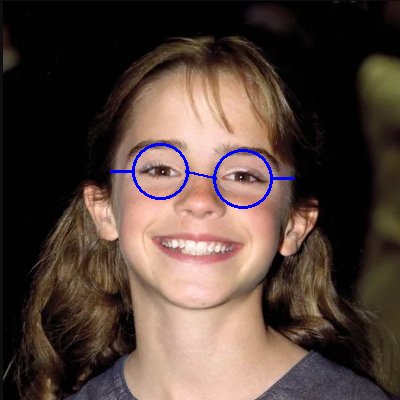

In [250]:
variant_data = dataframe.iloc[1]
process_image(variant_data)

### Тести на інших зображеннях:

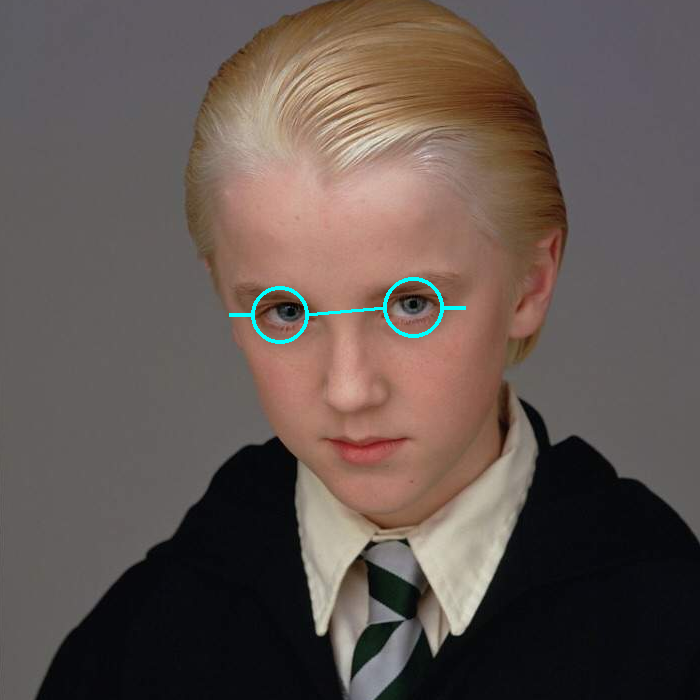

In [251]:
variant_data = dataframe.iloc[2]
process_image(variant_data)

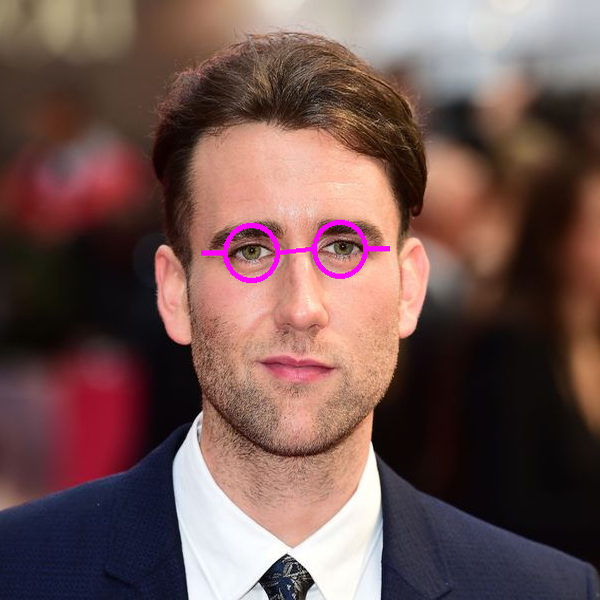

In [252]:
variant_data = dataframe.iloc[3]
process_image(variant_data)